<a href="https://colab.research.google.com/github/mikosa01/TEAMNOLT/blob/main/group_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
from pathlib import Path
import sys 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot  as plt 
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1c06v0ViaOvssxGV14zbggB72NcvFR6AE'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Group_Project_Data.zip') 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
zip_files = ['Train', 'Valid']
for zip_file in zip_files:
  with zipfile.ZipFile('Group_Project_Data.zip'.format(zip_file), 'r') as z: 
    z.extractall('.')
    print('{} unzipped'.format(zip_file))

Train unzipped
Valid unzipped


In [4]:
train_dir =  '/content/Group_Project_Data/Train'
val_dir =  '/content/Group_Project_Data/Valid'

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255)  # rescale pixel values to [0, 1]
val_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # resize images to 224x224 pixels
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'  # for multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [36]:
from keras import regularizers


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'valid', kernel_initializer='he_normal',  input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same',kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2), ),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same',kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [8]:
# train_generator_labels = np.expand_dims(train_generator.labels, axis=-1)

In [37]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

In [39]:
history= model.fit(train_generator, epochs=10, validation_data=val_generator, verbose = 2, callbacks = [early_stopping])

Epoch 1/10
188/188 - 6s - loss: 0.6251 - accuracy: 0.8433 - val_loss: 0.1533 - val_accuracy: 0.9925 - 6s/epoch - 34ms/step
Epoch 2/10
188/188 - 3s - loss: 0.1384 - accuracy: 0.9928 - val_loss: 0.0975 - val_accuracy: 0.9980 - 3s/epoch - 18ms/step
Epoch 3/10
188/188 - 3s - loss: 0.1111 - accuracy: 0.9923 - val_loss: 0.0931 - val_accuracy: 0.9935 - 3s/epoch - 18ms/step
Epoch 4/10
188/188 - 4s - loss: 0.0905 - accuracy: 0.9945 - val_loss: 0.0733 - val_accuracy: 0.9955 - 4s/epoch - 21ms/step
Epoch 5/10
188/188 - 3s - loss: 0.0787 - accuracy: 0.9943 - val_loss: 0.0656 - val_accuracy: 0.9970 - 3s/epoch - 18ms/step
Epoch 6/10
188/188 - 3s - loss: 0.0672 - accuracy: 0.9963 - val_loss: 0.0519 - val_accuracy: 0.9975 - 3s/epoch - 17ms/step
Epoch 7/10
188/188 - 3s - loss: 0.0541 - accuracy: 0.9973 - val_loss: 0.0505 - val_accuracy: 0.9960 - 3s/epoch - 18ms/step
Epoch 8/10
188/188 - 3s - loss: 0.0534 - accuracy: 0.9963 - val_loss: 0.0452 - val_accuracy: 0.9985 - 3s/epoch - 18ms/step
Epoch 9/10
188/1

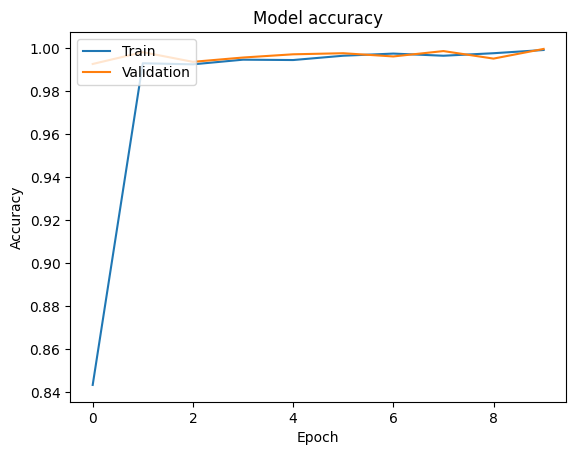

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

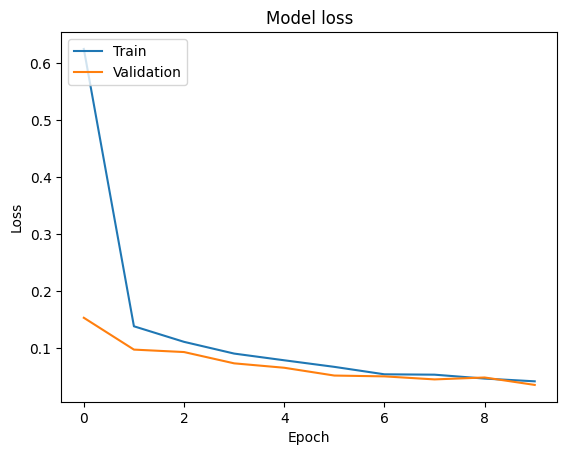

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()